# **Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering**

![Penguin Pic](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

## Explorative Data Analysis

In [2]:
penguins_df.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
6,38.9,17.8,181.0,3625.0,FEMALE
7,39.2,19.6,195.0,4675.0,MALE
8,34.1,18.1,193.0,3475.0,NaN
9,42.0,20.2,5000.0,4250.0,MALE


In [3]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [4]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [5]:
penguins_df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [6]:
to_drop = penguins_df[penguins_df.isnull().all(axis=1)].index.tolist()
# to_drop
new_penguins_df = penguins_df.drop(to_drop)
# penguins_df[penguins_df.isnull().all(axis=1)]
new_penguins_df.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
6,38.9,17.8,181.0,3625.0,FEMALE
7,39.2,19.6,195.0,4675.0,MALE
8,34.1,18.1,193.0,3475.0,NaN
9,42.0,20.2,5000.0,4250.0,MALE
10,37.8,17.1,186.0,3300.0,NaN


In [7]:
unclean_pengs = new_penguins_df[(new_penguins_df['sex']=='.') | new_penguins_df.isna().any(axis=1)].index.tolist()
clean_pengs = new_penguins_df.drop(unclean_pengs)
clean_pengs.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
new_penguins_df[new_penguins_df.isna().any(axis=1)]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,34.1,18.1,193.0,3475.0,NaN
10,37.8,17.1,186.0,3300.0,NaN
11,37.8,17.3,180.0,3700.0,NaN
47,37.5,18.9,179.0,2975.0,NaN
246,44.5,14.3,216.0,4100.0,NaN
286,46.2,14.4,214.0,4650.0,NaN
324,47.3,13.8,216.0,4725.0,NaN


In [9]:
penguins_df[penguins_df['sex']=='.']

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,44.5,15.7,217.0,4875.0,.


In [11]:
male_means = new_penguins_df[new_penguins_df['sex']=='MALE'].drop(columns=['sex']).mean()
female_means = new_penguins_df[new_penguins_df['sex']=='FEMALE'].drop(columns=['sex']).mean()

print(male_means,'\n\n', female_means)

culmen_length_mm       45.831953
culmen_depth_mm        17.904734
flipper_length_mm     230.928994
body_mass_g          4543.934911
dtype: float64 

 culmen_length_mm       42.096970
culmen_depth_mm        16.425455
flipper_length_mm     197.363636
body_mass_g          3862.272727
dtype: float64


In [12]:
male_penguins = new_penguins_df[new_penguins_df['sex']=='MALE']
female_penguins = new_penguins_df[new_penguins_df['sex']=='FEMALE']

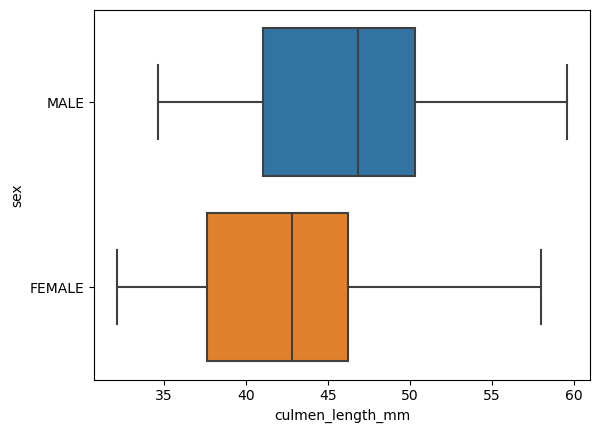

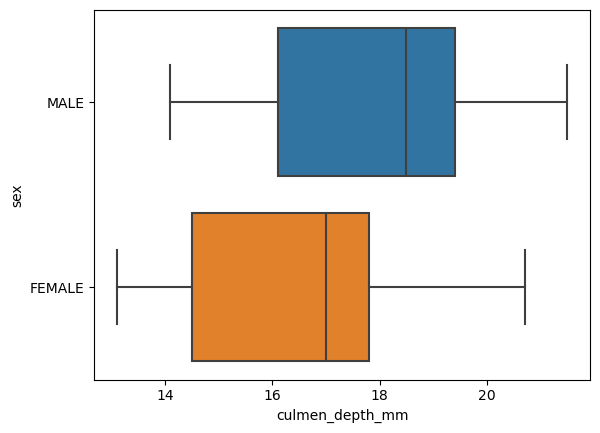

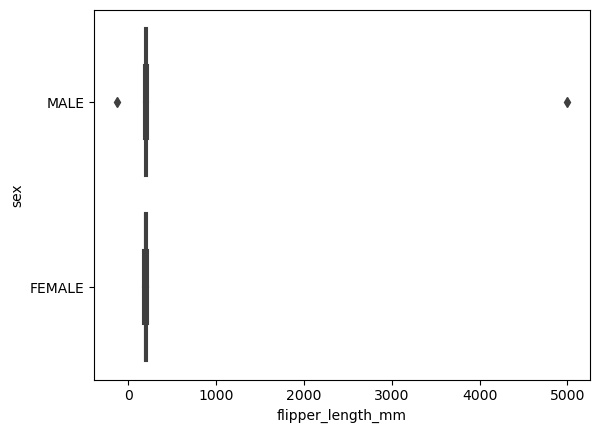

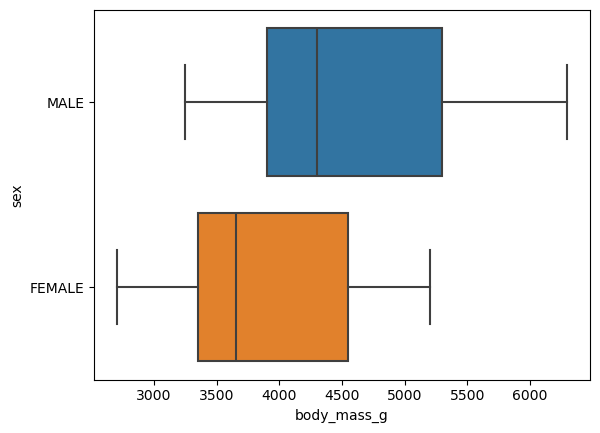

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 640x480 with 0 Axes>

In [13]:
import seaborn as sns
for col in clean_pengs.columns:
    sns.boxplot(data = clean_pengs, x = col, y = 'sex' )
    plt.show()
    plt.clf()

213.0 190.0
247.5 155.5


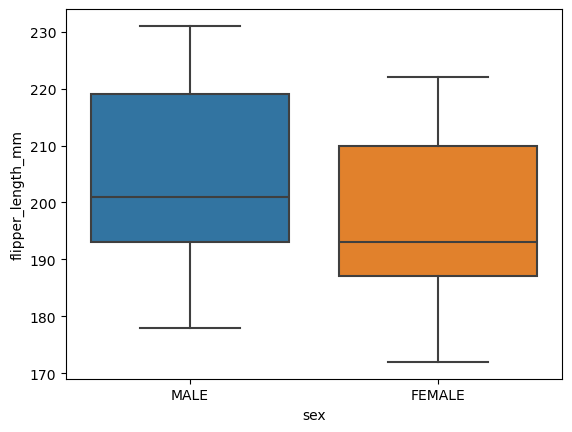

In [14]:
threshold_75 = clean_pengs['flipper_length_mm'].quantile(.75)
threshold_25 = clean_pengs['flipper_length_mm'].quantile(.25)
flipper_iqr = threshold_75 - threshold_25
print(threshold_75, threshold_25)

upper = threshold_75 + (1.5 * flipper_iqr)
lower = threshold_25 - (1.5 * flipper_iqr)

print(upper, lower)

cleaned_flipper_df = clean_pengs[(clean_pengs['flipper_length_mm'] > lower) & (clean_pengs['flipper_length_mm'] < upper)]
sns.boxplot(data = cleaned_flipper_df, x = 'sex', y = 'flipper_length_mm')
plt.show()

## Preprocessing

In [15]:
penguins_clean = pd.get_dummies(cleaned_flipper_df)
penguins_clean.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(penguins_clean)
print(x,'\n', type(x),'\n')
penguins_preprocessed = pd.DataFrame(data = x, columns = penguins_clean.columns)
penguins_preprocessed.head()

[[-0.90390586  0.79035987 -1.42534179 -0.56694801 -0.99399394  0.99399394]
 [-0.83043377  0.12618674 -1.0685765  -0.50484747  1.00604235 -1.00604235]
 [-0.68348959  0.43272819 -0.42639899 -1.18795343  1.00604235 -1.00604235]
 ...
 [ 1.17168063 -0.74234736  1.50013355  1.91707363 -0.99399394  0.99399394]
 [ 0.21654349 -1.20215952  0.78660298  1.23396768  1.00604235 -1.00604235]
 [ 1.07984052 -0.53798639  0.85795603  1.48236985 -0.99399394  0.99399394]] 
 <class 'numpy.ndarray'> 



,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994


## Performing Principal Component Analysis

6 

 None 

 [[ 4.34281438e-01 -1.55607490e-01  4.79180941e-01  5.08436072e-01
  -3.86693889e-01  3.86693889e-01]
 [ 9.64877499e-02 -6.12380135e-01  3.09138958e-01  1.87764728e-01
   4.92370895e-01 -4.92370895e-01]
 [ 8.60812686e-01  3.18321235e-01 -6.87104334e-02 -2.84846287e-01
   1.89492191e-01 -1.89492191e-01]
 [-2.08752238e-01  7.06715402e-01  4.05684502e-01  4.01655366e-01
   2.55996968e-01 -2.55996968e-01]
 [ 1.32339603e-01  1.34570851e-03 -7.10997673e-01  6.81008610e-01
   8.12219192e-02 -8.12219192e-02]
 [-0.00000000e+00  4.37526576e-16 -3.27912855e-16  8.48456364e-16
  -7.07106781e-01 -7.07106781e-01]] 
components


 [5.20340616e-01 3.44631118e-01 8.58556863e-02 3.22911959e-02
 1.68813837e-02 3.39957056e-33] 



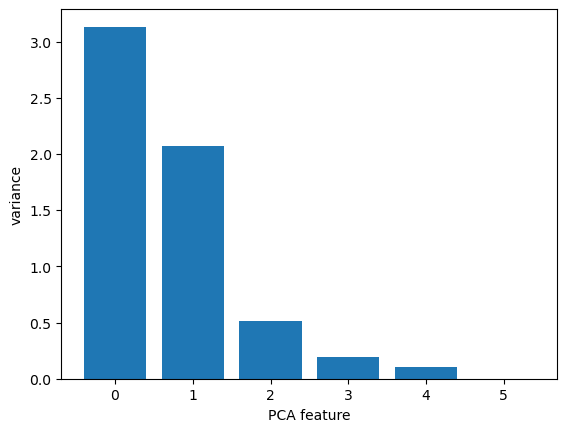

In [17]:
from sklearn.decomposition import PCA

pca = PCA()

pca_fit = pca.fit(penguins_preprocessed)
print(pca_fit.n_components_,'\n\n',pca_fit.n_components, '\n\n',pca_fit.components_,'\ncomponents\n')
print('\n', pca_fit.explained_variance_ratio_,'\n')
features = range(pca_fit.n_components_)
plt.bar(features, pca_fit.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [18]:
n_components=sum(pca_fit.explained_variance_ratio_>0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
penguins_PCA[:3]

array([[-0.71804612, -2.09712541],
       [-1.92706259,  0.40815983],
       [-1.95054409,  0.30487714]])


 {1: 1723.0236944266235, 2: 951.5349701541761, 3: 436.00646891882184, 4: 125.81744652188243, 5: 116.72923396336543, 6: 82.31981906548198, 7: 52.97119439101954, 8: 51.176105878625904, 9: 46.65327940321637} 



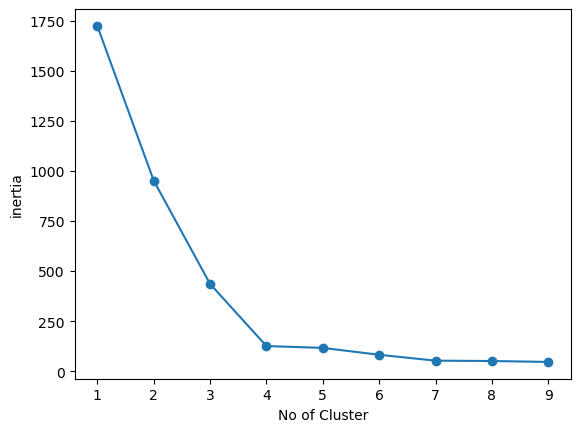

In [19]:
inertia = []
inertia_b = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters = k,random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
    inertia_b[k] = kmeans.inertia_
print('\n', inertia_b,'\n')
plt.plot(range(1,10), inertia ,marker='o')
plt.xlabel("No of Cluster")
plt.ylabel('inertia')
plt.show()

## Creating a cluster of 4 derived from inertia

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


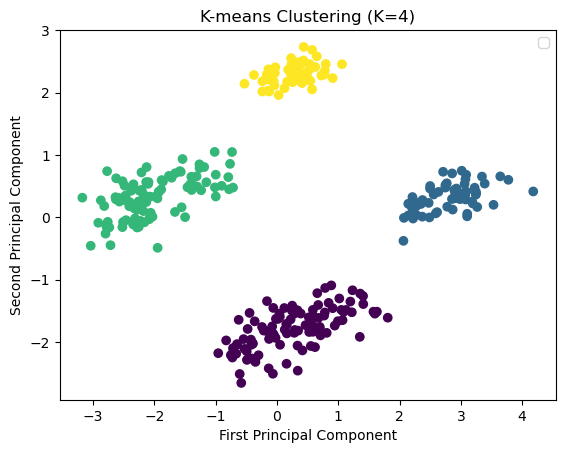

In [20]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
penguin_labels = kmeans.fit(penguins_PCA)
penguins_clean['labels'] = penguin_labels.labels_
plt.scatter(penguins_PCA[:,0],penguins_PCA[:,1], c = kmeans.labels_)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K=4)')
plt.legend()
plt.show()


In [21]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','labels']
stat_penguins = penguins_clean[numeric_columns].groupby('labels').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
labels,,,
0,43.878302,19.111321,194.764151
1,49.473770,15.718033,221.540984
2,40.217757,17.611215,189.046729
3,45.563793,14.237931,212.706897
